<a href="https://colab.research.google.com/github/SoudruhRomanCZ/KRIVANEK-240642-MLF/blob/main/Project/Kopie_se%C5%A1itu_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJEKT**

#0. Import needed libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. data preprocesing
## 1.1 Importing data

In [4]:
print(os.listdir('/content/drive/MyDrive/MPA-MLF-Project_data'))

['test_format.csv', 'label_train.csv', 'Test', 'Train']


In [5]:
# Set the path to your data
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/MPA-MLF-Project_data'


# Load the CSV files
label_train = pd.read_csv(os.path.join(data_path, 'label_train.csv'))
test_format = pd.read_csv(os.path.join(data_path, 'test_format.csv'))

# Load all NPY files from the Train directory
train_data = []
for i in range(1491):  # Assuming files are named from 0.npy to 1490.npy
    file_path = os.path.join(data_path, 'Train', f'{i}.npy')
    if os.path.exists(file_path):
        data = np.load(file_path)
        train_data.append(data)

# Convert list to a NumPy array
train_data = np.array(train_data)

# Load all NPY files from the Test directory
test_data = []
for i in range(120):  # Assuming files are named from 0.npy to 119.npy
    file_path = os.path.join(data_path, 'Test', f'{i}.npy')
    if os.path.exists(file_path):
        data = np.load(file_path)
        test_data.append(data)

# Convert list to a NumPy array
test_data = np.array(test_data)

# Display the shapes of the loaded data
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data shape: (1370, 72, 48)
Test data shape: (60, 72, 48)


In [14]:
print(train_data[0])
print(test_data[0])
print(label_train.iloc[1490])
print(test_format.iloc[119])

[[-65.33003204 -53.49843975 -65.80925821 ... -66.19234432 -59.89075444
  -70.63201064]
 [-63.42907184 -55.63424407 -63.61514932 ... -57.97438065 -63.29054232
  -71.07774073]
 [-54.69060531 -57.93483718 -62.98140967 ... -66.1461248  -62.29787659
  -73.78038156]
 ...
 [-73.06245607 -58.32765227 -59.23150211 ... -68.82391944 -51.90258185
  -67.58710111]
 [-69.89740101 -50.26717406 -67.0477066  ... -68.31013915 -62.80070959
  -71.83377166]
 [-68.31687869 -46.26460055 -55.89183435 ... -62.87284549 -60.64273588
  -69.68556631]]
[[-50.72546253 -58.76254452 -55.44039168 ... -40.09933955 -47.79147401
  -58.66140835]
 [-39.09885058 -65.03150615 -58.34635738 ... -49.91336467 -52.73558606
  -60.4689321 ]
 [-43.96597752 -53.79360655 -62.06502358 ... -50.80643534 -52.98912674
  -63.13888658]
 ...
 [-39.80058424 -48.97677706 -51.26160996 ... -46.06167131 -51.65748403
  -64.4145106 ]
 [-43.27415756 -52.61383515 -38.82179832 ... -44.36836457 -57.2014622
  -60.09337591]
 [-39.13275175 -52.05973852 -52.1

IndexError: single positional indexer is out-of-bounds

##1.2 Preprocesing data

In [6]:
y_train = label_train["target"].values  # Extrahujeme správný sloupec
y_test = test_format["target"].values   # Testovací štítky

In [7]:
# Přetvarujeme data tak, aby každý vzorek byl jedním řádkem (3456 = 72*48)
X_train_reshaped = train_data.reshape(train_data.shape[0], -1)
X_test_reshaped = test_data.reshape(test_data.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Vracíme data zpět do původního 2D tvaru
X_train_scaled = X_train_scaled.reshape(train_data.shape)
X_test_scaled = X_test_scaled.reshape(test_data.shape)

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(1370, 3456)
(60, 3456)
(1370, 72, 48)
(60, 72, 48)


In [8]:
X_train_final = X_train_scaled[..., np.newaxis]  # tvar (1491, 72, 48, 1)
X_test_final = X_test_scaled[..., np.newaxis]

In [58]:
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

print(y_train_encoded.shape)
print(y_test_encoded.shape)
print()
print(y_train_encoded[10:20])
print()
print(y_test_encoded[50:60])

(1370, 3)
(60, 3)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


#2. Model Selection and Implementation

In [126]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(72, 48, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 72, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 36, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │       221,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,411 (864.89 KB)

 Trainable params: 221,411 (864.89 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Compute class weights from original labels
#y_train_classes = np.argmax(y_train_encoded, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train_encoded, axis=1)),
    y=np.argmax(y_train_encoded, axis=1)
)
class_weights = dict(enumerate(class_weights))

#3. Model Training

In [128]:
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_final, y_train_encoded,
                    validation_data=(X_test_final, y_test_encoded),
                    epochs=20,
                    batch_size=32,
                    class_weight=class_weights,
                    )

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5750 - loss: 1.4330 - val_accuracy: 0.9167 - val_loss: 0.7787
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6028 - loss: 1.3350 - val_accuracy: 0.9333 - val_loss: 0.7971
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6671 - loss: 1.2663 - val_accuracy: 0.8667 - val_loss: 0.8281
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7414 - loss: 0.9988 - val_accuracy: 0.7500 - val_loss: 0.8579
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7334 - loss: 1.0314 - val_accuracy: 0.6167 - val_loss: 0.9001
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7566 - loss: 1.0320 - val_accuracy: 0.6000 - val_loss: 0.9380
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7761 - loss: 0.9592 - val_accuracy: 0.5833 - val_loss: 0.9908
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7937 - loss: 1.0250 - val_accuracy: 0.5333 - val_loss

#4. Model Evaluation

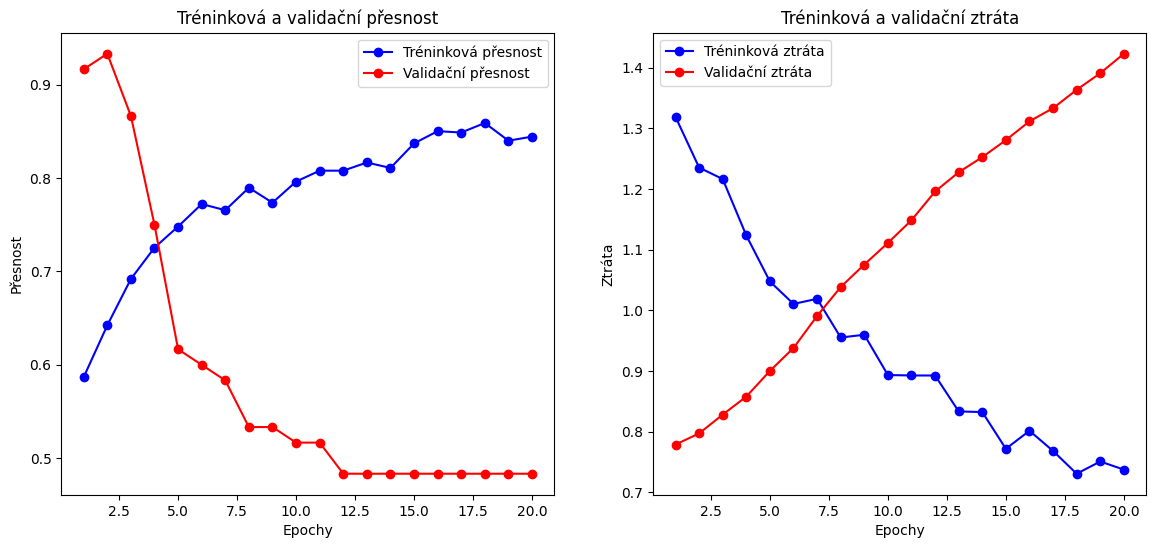

In [129]:
# Získání metrik z objektu history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Počet epoch
epochs = range(1, len(acc) + 1)

# Vykreslení přesnosti
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Tréninková přesnost')
plt.plot(epochs, val_acc, 'ro-', label='Validační přesnost')
plt.title('Tréninková a validační přesnost')
plt.xlabel('Epochy')
plt.ylabel('Přesnost')
plt.legend()

# Vykreslení ztráty
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Tréninková ztráta')
plt.plot(epochs, val_loss, 'ro-', label='Validační ztráta')
plt.title('Tréninková a validační ztráta')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()

plt.show()

#5. Hyperparameter Tuning

#6. Conclusion



In [14]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_final)
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(y_pred, axis=1))
print(cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step
[[ 0 59  1]
 [ 0  0  0]
 [ 0  0  0]]


In [82]:
# =======================
# 3. Compute Class Weights
# =======================
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# =======================
# 4. Define Model
# =======================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(72, 48, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# =======================
# 5. Train Model
# =======================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    class_weight=class_weights,
                    callbacks=[early_stop])

# =======================
# 6. Plot Training History
# =======================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


NameError: name 'y' is not defined